In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import datetime

In [ ]:
start = datetime(datetime.now().year - 1, datetime.now().month, datetime.now().day)
end = datetime.now()

# getting stock data
stock_list = ['AMZN', 'GOOG', 'FB', 'NFLX']
for stock in stock_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [ ]:
# setup the moving average per interval
moving_average_intervals = [5, 20, 50]
for interval in moving_average_intervals:
    GOOG[f'ma-{interval}'] = GOOG['Adj Close'].rolling(interval).mean()

In [ ]:
# GOOG[['Adj Close', 'ma-5', 'ma-20', 'ma-50']].plot(figsize=(16, 6), legend=True)

In [ ]:
# daily return calculation
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

In [ ]:
new_stocks_list = ['MSFT', 'NFLX']
for new_stock in new_stocks_list:
    adj_close_stock_prices[new_stock] = DataReader(new_stock, 'yahoo', start, end)['Adj Close']

adj_stocks_return = adj_close_stock_prices.pct_change().dropna()

# plt.plot(adj_stocks_return['NFLX'])
# plt.show()

In [ ]:
import seaborn as sns

In [ ]:
# stocks prices cross comparison
sns.jointplot('MSFT', 'MSFT', data=adj_stocks_return, color='orange')

In [ ]:
# stocks prices cross comparison
# sns.pairplot(data=adj_stocks_return)

In [ ]:
# calculate Value At Risk (VaR)
# sns.distplot(GOOG['Daily Return'].dropna(), bins=100)
stock_returns = GOOG['Daily Return'].dropna()

In [ ]:
# pct of daily lose - VaR (the worst we can loose per day for the last year)
# quantile(0.05) > 95% of time we loose -2.37%
# quantile(0.95) > 5% of time we loose +2.58%
stock_returns.quantile(0.95) * 100

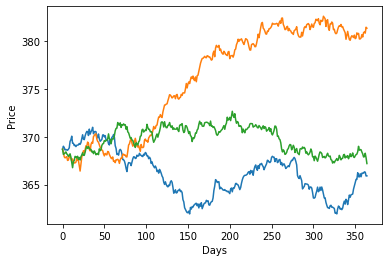

In [91]:
# monte carlo simulation
starting_price = 368.700012

days = 365
dt = 1 / days 
sigma = stock_returns.std()
mu = stock_returns.mean()

def monte_carlo_analysis(starting_price, days, mu, sigma):
  
  price = np.zeros(days)
  price[0] = starting_price
  shock = np.zeros(days)
  drift = np.zeros(days)

  for day in range(1, days):
    shock[day] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
    drift[day] = mu * dt
    price[day] = price[day - 1] + (price[day - 1] * (drift[day] + shock[day]))
  return price

for run in range(3):
  price = monte_carlo_analysis(starting_price, days, mu, sigma)
  plt.plot(price)
  plt.xlabel("Days")
  plt.ylabel("Price")